In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

## Task 12.1

Suppose A is a $202 \times 202$ matrix with $||A||_2=100$ and $||A||_F=101$. Give the sharpes possible lower bound on the 2-norm condition number $\kappa(A)$.

## Solution

$||A||_F=\sqrt{\sum_{i,j}|A_{i,j}|^2}$ by definition.

$||A||_F = \sqrt{\mathrm{Tr}(AA^{\mathrm{T}})}$, using SVD $A=U\Sigma V^{\mathrm{T}}$:

$||A||_F = \sqrt{\mathrm{Tr}(AA^{\mathrm{T}})} = \sqrt{\mathrm{Tr}(U\Sigma \Sigma^{\mathrm{T}} U^{\mathrm{T}})}$, using circular permutations invariants for trace:

$||A||_F = \sqrt{\sum_{i=1}^m \sigma_i^2}$, where $\sigma_i$ - ith singular number of matrix $A$ and $m=\mathrm{rank}(A)$.

$\kappa(A)=\sigma_1 / \sigma_m$, we know $\sigma_1=||A||_2=100$, so let's estimate $\sigma_m$:

$||A||_F \leq \sqrt{\sigma_1^2 + 201 * \sigma_m^2}$. So $101^2 \leq 100^2 + 201 * \sigma_m^2$.

$1 \leq \sigma_m^2$, or as $\sigma_i \geq 0$ we get $1 \leq \sigma_m$ and finally:

$\kappa(A) \geq 100$. The end.

## Task 12.2

a) Derive $m \times n$ matrix $A$ that maps n-vector of data at ${x_j}$ to an m-vector of sampled values ${y_j}$, where p is the degree n-1 polynomial interpolant of the data.

b) Write a program to calculate $A$ and plot $||A||_{\infty}$ on semilog scale for $n=1,2,...,30$, $m=2n-1$.

In [6]:
def get_matrix_y(n: int):
    m = 2*n -1
    cols = []
    cols.append(np.ones(m, dtype=np.float64)) # cols of 1
    col = np.linspace(-1, 1, m, dtype=np.float64)
    col_1 = np.copy(col)
    cols.append(np.copy(col_1))
    for i in range(n - 2):
        col_1 = col_1 * col
        cols.append(np.copy(col_1))
    return np.column_stack(cols)

def get_matrix_x(n: int):
    cols = []
    cols.append(np.ones(n, dtype=np.float64)) # cols of 1
    col = np.linspace(-1, 1, n, dtype=np.float64)
    col_1 = np.copy(col)
    cols.append(np.copy(col_1))
    for i in range(n - 2):
        col_1 = col_1 * col
        cols.append(np.copy(col_1))
    return np.column_stack(cols)

def get_matrix(n: int):
    return np.dot(get_matrix_y(n),np.linalg.inv(get_matrix_x(n)))
    

In [7]:
def find_infty_norm(matrix):
    abs_matrix = np.abs(matrix)
    return np.max(np.sum(abs_matrix, axis=1))

In [ ]:
a_infty_values = [find_infty_norm(get_matrix(n)) for n in range(4, 35)]
n_arr = np.arange(4, 35)
plt.plot(n_arr, a_infty_values)
plt.plot(n_arr, 2**(n_arr-1)/(np.exp(1)*(n_arr-2)*np.log(n_arr-2)), color='red')
plt.yscale('log')
plt.grid()

## Task 12.3

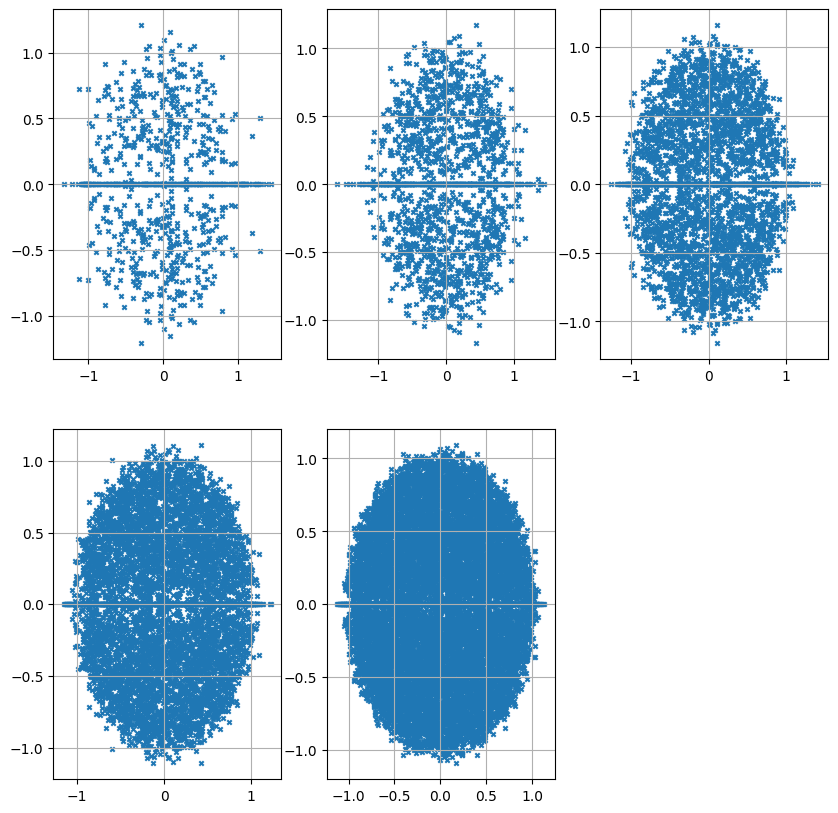

In [36]:
plt.figure(figsize=(10, 10))
for m in [2**i for i in range(3, 8)]:
    plt.subplot(2, 3, int(np.log2(m))-2)
    samples = 100
    matrix = np.random.default_rng().standard_normal(size=(samples, m, m), dtype=np.float64) / np.sqrt(m, dtype=np.float64)
    eig_vals = np.linalg.eigvals(matrix)
    plt.scatter(eig_vals.reshape(-1).real, eig_vals.reshape(-1).imag, marker='x', s=10)
    plt.grid()
plt.show()

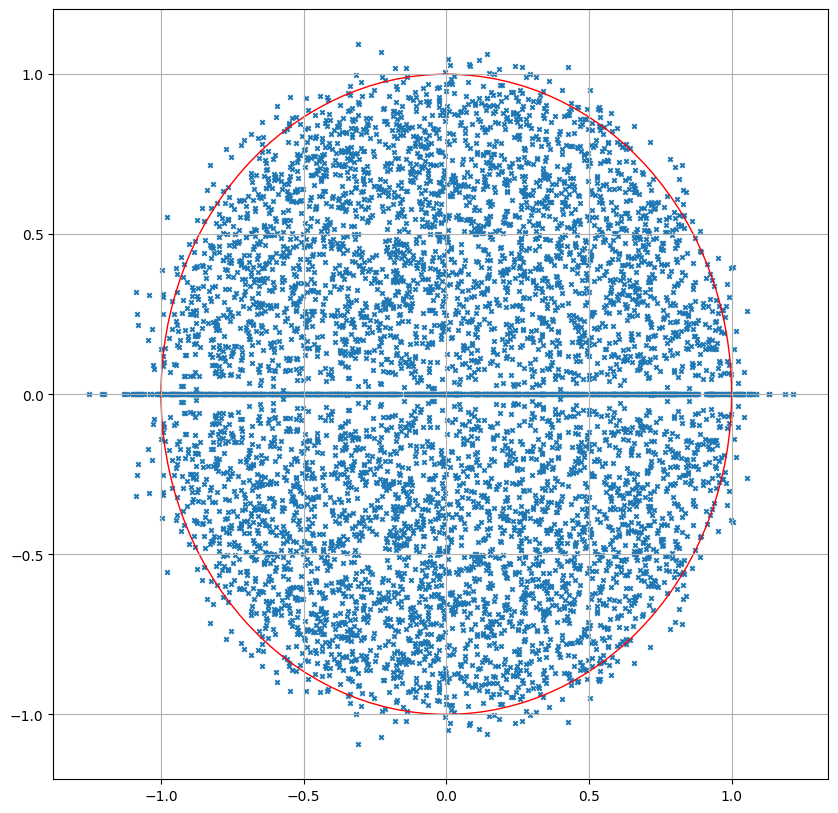

In [46]:
plt.figure(figsize=(10, 10))
samples = 100
m = 64
matrix = np.random.default_rng().standard_normal(size=(samples, m, m), dtype=np.float64) / np.sqrt(m, dtype=np.float64)
eig_vals = np.linalg.eigvals(matrix)
plt.scatter(eig_vals.reshape(-1).real, eig_vals.reshape(-1).imag, marker='x', s=10)
c1 = plt.Circle((0, 0), 1, color='red', fill=False)
plt.gca().add_artist(c1)
plt.grid()
plt.show()

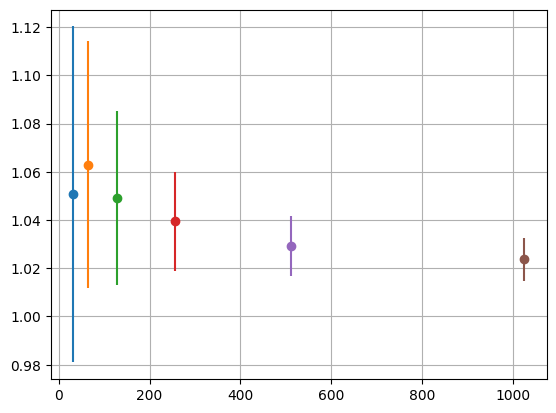

In [15]:
for m in [2**i for i in range(5, 11)]:
    samples = 100
    matrix = np.random.default_rng().standard_normal(size=(samples, m, m), dtype=np.float64) / np.sqrt(m, dtype=np.float64)
    eig_vals = np.linalg.eigvals(matrix)
    max_eig_vals = np.abs(eig_vals).max(axis=1)
    mean_max_eig_val = max_eig_vals.mean()
    sigma_max_eig_val = max_eig_vals.std()
    plt.errorbar(m, mean_max_eig_val, yerr=sigma_max_eig_val, fmt='o')
plt.grid()
plt.show()

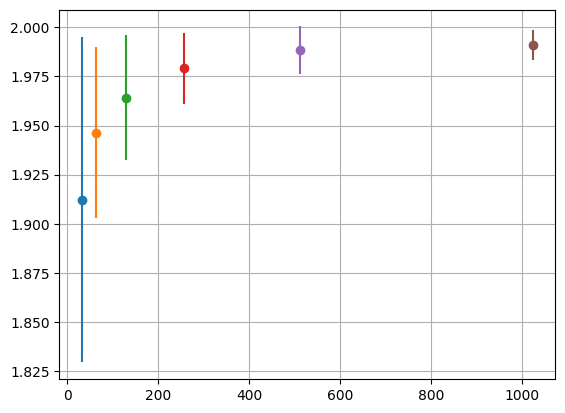

In [ ]:
for m in [2**i for i in range(5, 11)]:
    samples = 100
    matrix = np.random.default_rng().standard_normal(size=(samples, m, m), dtype=np.float64) / np.sqrt(m, dtype=np.float64)
    max_sing_vals = np.linalg.svd(matrix, compute_uv=False, hermitian=False)[:, 0]
    mean_max_sing_vals = max_sing_vals.mean()
    sigma_max_sing_vals = max_sing_vals.std()
    plt.errorbar(m, mean_max_sing_vals, yerr=sigma_max_sing_vals, fmt='o')
plt.grid()
plt.show()

Looks like $||A||$ tends to 2 and $\rho(A) \to 1$. But it hard to say what will be the limit when $m\to \infty$.
Obviously $||A||$ and $\rho(A)$ doesn't converge to each other when $m \to \infty$.

Let's look at the tail of the lowest singular value probability destribution.

In [36]:
from tqdm import tqdm_notebook

In [37]:
ranges = np.array([(1/(2**i)) for i in range(1, 50)], dtype=np.float64)
matrix_sides = [5, 25, 50, 100, 256, 512]

/var/folders/6n/lpxwwdr530xghvxb9k0tdlgc0000gn/T/ipykernel_14240/1539967998.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, m in enumerate(tqdm_notebook(matrix_sides)):


  0%|          | 0/6 [00:00<?, ?it/s]

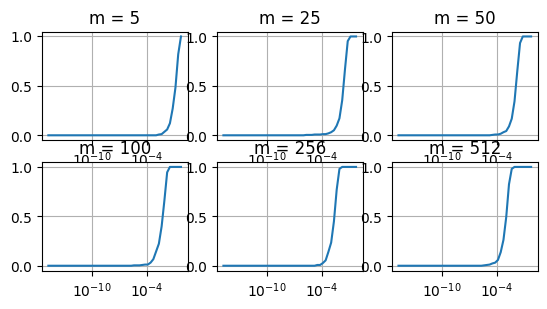

In [38]:
for i, m in enumerate(tqdm_notebook(matrix_sides)):
    samples = 256
    matrix = np.random.default_rng().standard_normal(size=(samples, m, m), dtype=np.float64) / np.sqrt(m, dtype=np.float64)
    svd_vals = np.linalg.svd(matrix, compute_uv=False, hermitian=False)
    plt.subplot(3, 3, i + 1)
    plt.title(f'm = {m}')
    plt.plot(ranges, (svd_vals[:, -1, np.newaxis] <= ranges[np.newaxis, :]).sum(axis=0) / samples)
    plt.xscale('log')
    plt.grid()
plt.show()

With $m \to \infty$ destribution becomes more sharp. Like $\approx 10^{-4}$ is the least possible $\sigma_m$. Interesting...